# We are going to explore Wine dataset which is mix of white and red wine dataset

In [1]:
# import commonly used libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import sklearn
import seaborn
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("../data/PreProcessed/MixWine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_name
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_name             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


## As we can see there are 13 features and total 6497 entries, 'quality' feature is of integer type and wine_name feature is categorical 

In [4]:
df[df.isnull()].sum()

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
wine_name                 0
dtype: object

## As we can see above there are no missing values in the dataset. 

In [5]:
# Let's see statistical summary of the dataset, including only numberic features(excluding wine_name)
include_data_types = ['number']
numeric_summary = df.describe(include=include_data_types)
numeric_summary

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## *Some observations from the summary statistics*
1. 'fixed acidity' 
   - mean and median are close so they both provide a good estimate of the central tendency of fixed acidity values
   - close mean and median suggest that data is symmetric 
   - mean and median are close so no strong skewness can be expected
   - max value is 15.9 
   - Subpoint 3

2. 'residual sugar'
   - mean is 5.44, median is 3, and the max value is 65.8, which is far higher than 75% of the values, indicating the presence of outliers and right skewness.
   - Standard deviation is high, indicating a variety of sugar levels in different wines.

These observations can be used for:
   - Finding variation in sweetness levels among the wines.
   - Making decisions related to wine quality.
   - Classification based on sugar content.
3. 'total sulfur dioxide and free sulfur dioxid'
   - standard deviatin is significant so high variablity 
   - max values are high so potential outliers
4. 'alcohol'
   - Mean of 10.49 and median of 10.3 are quite  
   - max is 14 and min is 8

     

### Let us do some Univariate analysis on some features
## *1. pH - UNIVARIATE*

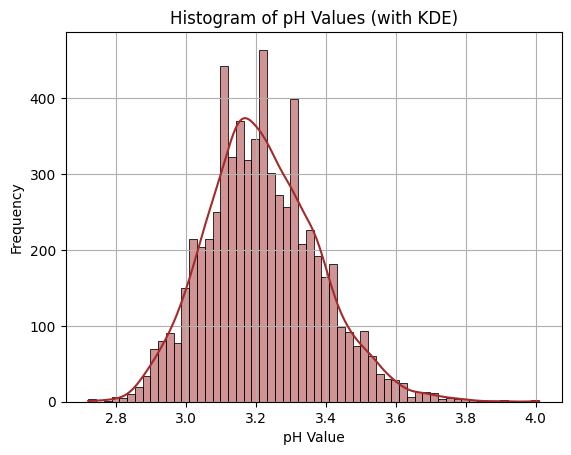

In [6]:
# Let us use seaborn as it makes bins automatically based on the data 
sns.histplot(df['pH'], bins='auto', kde=True, color='brown')
plt.xlabel('pH Value')
plt.ylabel('Frequency')
plt.title('Histogram of pH Values (with KDE)')
plt.grid(True)
plt.show()



#### pH distribution looks quite symmetric, also summary stats suggestes same as mean and median values were approx. same 

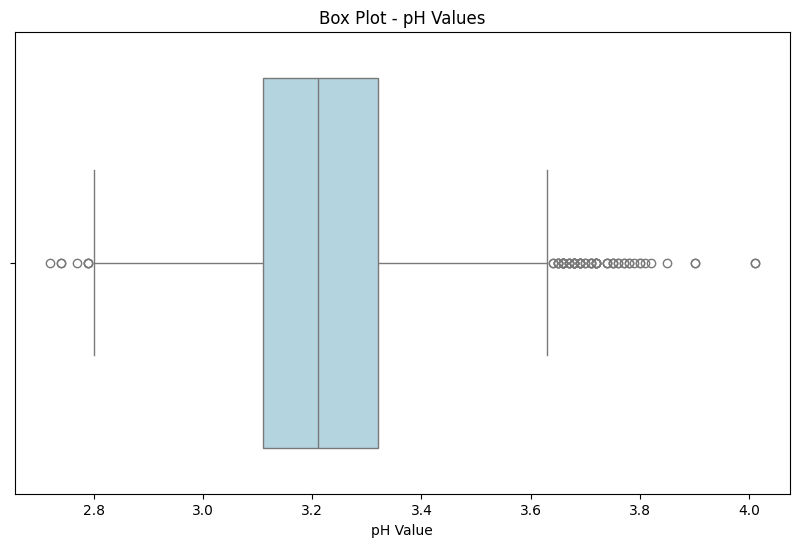

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='pH', data=df, color='lightblue', showfliers=True)  # 'x' specifies the column, and 'data' is your DataFrame
plt.xlabel('pH Value')
plt.title('Box Plot - pH Values')
plt.show()


In [8]:
# Let see find out the outliers in pH, thier percentage and how to remove them
# IQR for the 'pH' column
Q1 = df['pH'].quantile(0.25)
Q3 = df['pH'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to show only rows where 'pH' is an outlier
outliers_df = df[(df['pH'] < lower_bound) | (df['pH'] > upper_bound)]

# Display the rows containing outliers
len(outliers_df)/len(df) *100

1.1235955056179776

#### 1.12% values are outliers in pH, which is small amount. If we want to remove them, it should be ok for various future classifications, models etc. 

In [9]:
# we can filter dataset to get dataset without outliers and if required we can do anlysis on that
non_outliers_df = df[~df.index.isin(outliers_df.index)]

In [10]:
len(non_outliers_df)

6424

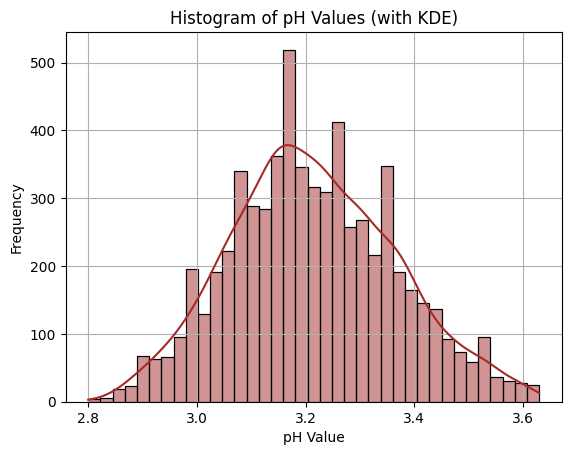

In [11]:
# let's see histrogrm of pH values wihtout outliers, it looks more symmetric now
sns.histplot(non_outliers_df['pH'], bins='auto', kde=True, color='brown')
plt.xlabel('pH Value')
plt.ylabel('Frequency')
plt.title('Histogram of pH Values (with KDE)')
plt.grid(True)
plt.show()

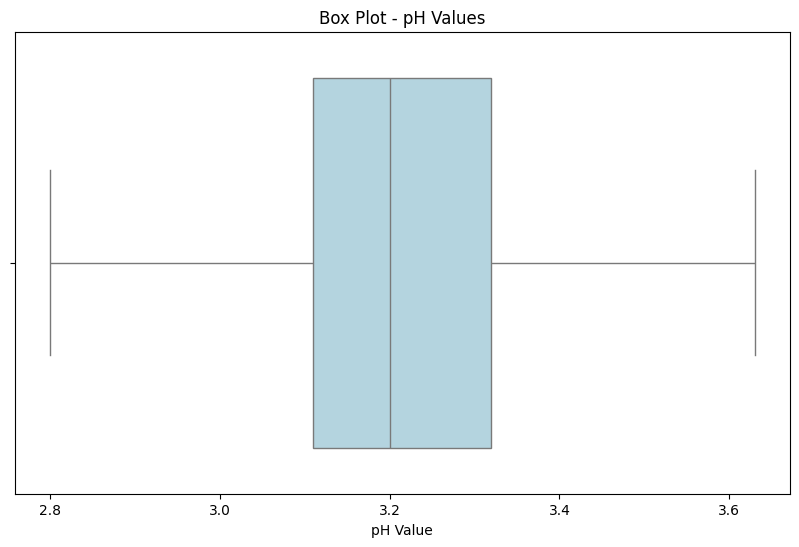

In [12]:
# Box plot without outlier values
plt.figure(figsize=(10, 6))
sns.boxplot(x='pH', data=non_outliers_df, color='lightblue', showfliers=True)  
plt.xlabel('pH Value')
plt.title('Box Plot - pH Values')
plt.show()

## *2. quality - UINVARIATE*

In [13]:
np.sort(df.quality.unique())

array([3, 4, 5, 6, 7, 8, 9])

In [14]:
df.quality.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [15]:
df.quality.describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

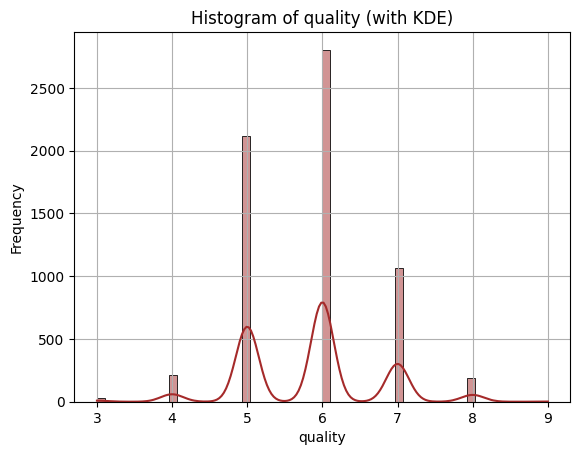

In [16]:
sns.histplot(non_outliers_df['quality'], bins='auto', kde=True, color='brown')
plt.xlabel('quality')
plt.ylabel('Frequency')
plt.title('Histogram of quality (with KDE)')
plt.grid(True)
plt.show()

In [17]:
#  wines with quality 5, 6 or 7
len(df[ (df['quality']==5) | (df['quality']==6) | (df['quality']==7) ]) / len(df) * 100

93.16607665076188

In [18]:
# wines with quality between 4 to 8
len(df[ (df['quality']>=4) & (df['quality']<=8) ]) / len(df) * 100

99.46128982607357

#### Quality of wine lies between (3-9), but 93 % of wines are between 5-7 quality, 99.5 % wines have quality between 4 to 8

## 3. Density - UINVARIATE

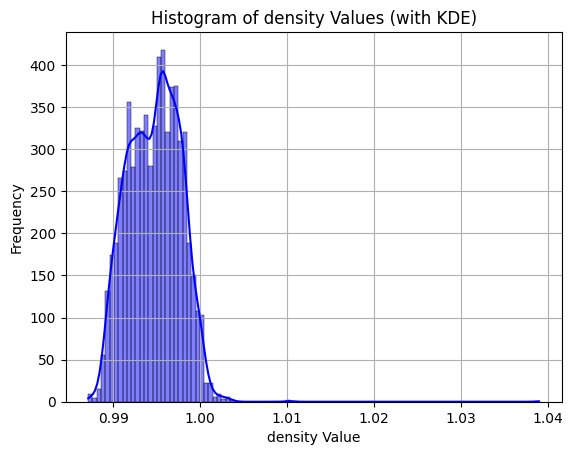

In [19]:
sns.histplot(df['density'], bins='auto', kde=True, color='blue')
plt.xlabel('density Value')
plt.ylabel('Frequency')
plt.title('Histogram of density Values (with KDE)')
plt.grid(True)
plt.show()

The density of the wines is tightly clustered around the mean, with a small number of outliers above and below.

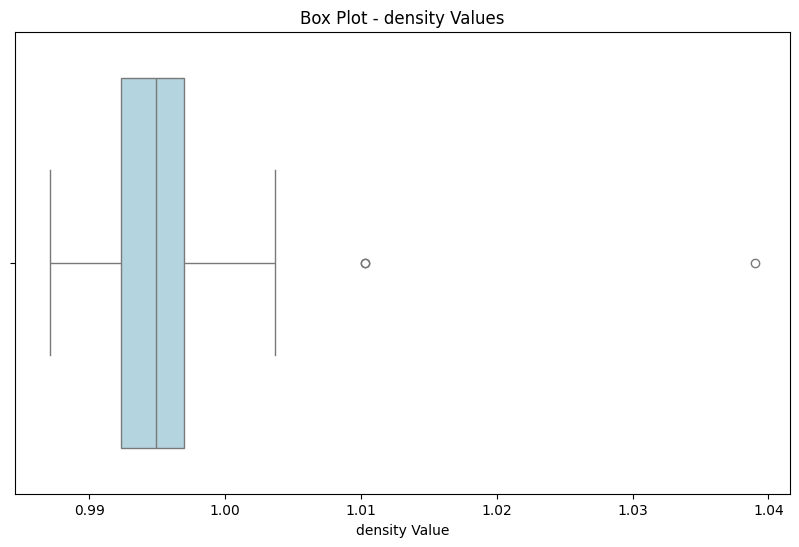

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='density', data=df, color='lightblue', showfliers=True)  # 'x' specifies the column, and 'data' is your DataFrame
plt.xlabel('density Value')
plt.title('Box Plot - density Values')
plt.show()

In [21]:
# Let see find out the outliers in density, thier percentage and how to remove them
# IQR for the 'pH' column
Q1 = df['density'].quantile(0.25)
Q3 = df['density'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to show only rows where 'density' is an outlier
outliers_df = df[(df['density'] < lower_bound) | (df['density'] > upper_bound)]

# Display the rows containing outliers
len(outliers_df)/len(df) *100

0.04617515776512237

 0.04% of outliers were identified in the Density column, which can be ignorable for the analysis.

In [22]:
non_outliers_df = df[~df.index.isin(outliers_df.index)]

In [23]:
len(non_outliers_df)

6494

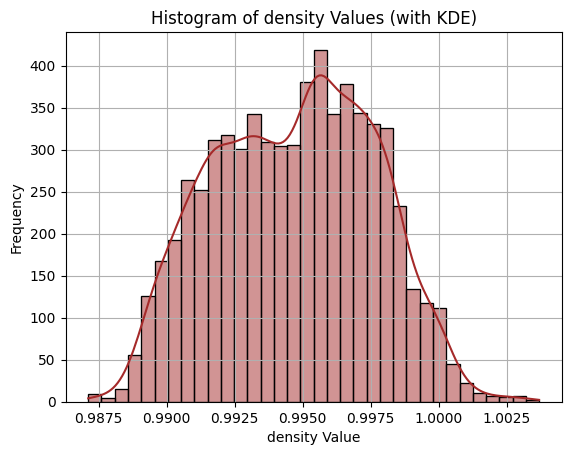

In [24]:
# let's see histrogrm of density values wihtout outliers, it looks more symmetric now
sns.histplot(non_outliers_df['density'], bins='auto', kde=True, color='brown')
plt.xlabel('density Value')
plt.ylabel('Frequency')
plt.title('Histogram of density Values (with KDE)')
plt.grid(True)
plt.show()

 Histogram of Density column without outliers

## Let's do some bivariate analysis 
### *1. Alcohol vs Wine type (Bivariate)*

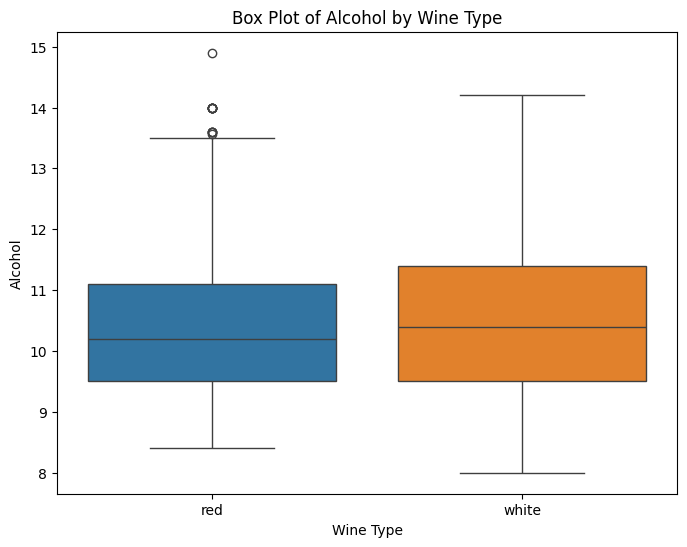

In [25]:
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
sns.boxplot(x='wine_name', y='alcohol', data=df, hue='wine_name')
plt.xlabel('Wine Type')
plt.ylabel('Alcohol')
plt.title('Box Plot of Alcohol by Wine Type')
plt.show()


#### So alcohol content in white and red wine has almost same median, perhaps both wines have comparable alcohol levels. . There are some outliers in red wine. 

### *2. Sugar vs Wine type (Bivariate)*

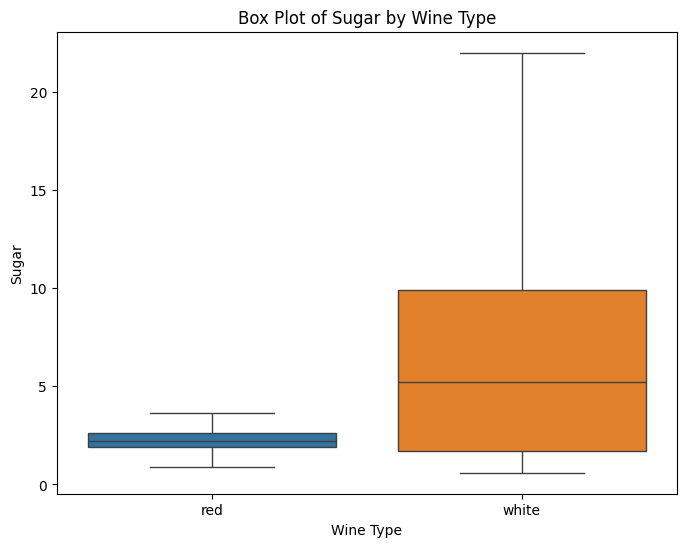

In [26]:
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
sns.boxplot(x='wine_name', y='residual sugar', data=df, hue='wine_name', showfliers=False)
plt.xlabel('Wine Type')
plt.ylabel('Sugar')
plt.title('Box Plot of Sugar by Wine Type')
plt.show()


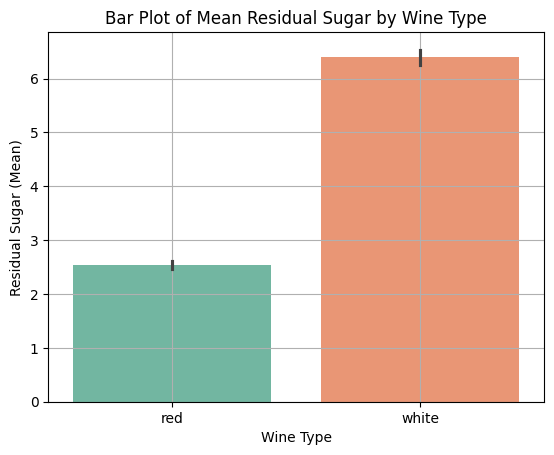

In [27]:
sns.barplot(x='wine_name', y='residual sugar', hue='wine_name',data=df, palette='Set2')
plt.xlabel('Wine Type')
plt.ylabel('Residual Sugar (Mean)')
plt.title('Bar Plot of Mean Residual Sugar by Wine Type')
plt.grid(True)
plt.show()

### *From boxplot and bar plot, it is clearly visible that red wine has less sugar(mean) and 
### *median and range of sugar is also less for red wine as compared to white*

### *3. density vs wine type (Bivariate)*

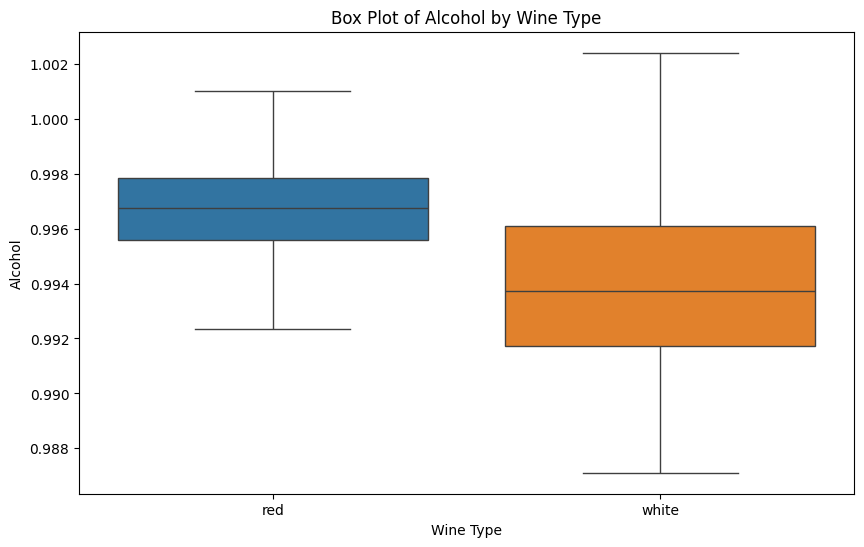

In [28]:
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
sns.boxplot(x='wine_name', y='density', data=df, hue='wine_name', showfliers=False)
plt.xlabel('Wine Type')
plt.ylabel('Alcohol')
plt.title('Box Plot of Alcohol by Wine Type')
plt.show()

#### Above box plot is without outliers(both have outliers though). Median for red wine is more that white wine. 
#### *We can say that red wine is denser than white wine.*

### *4. Alcohol vs density (Bivariate)*

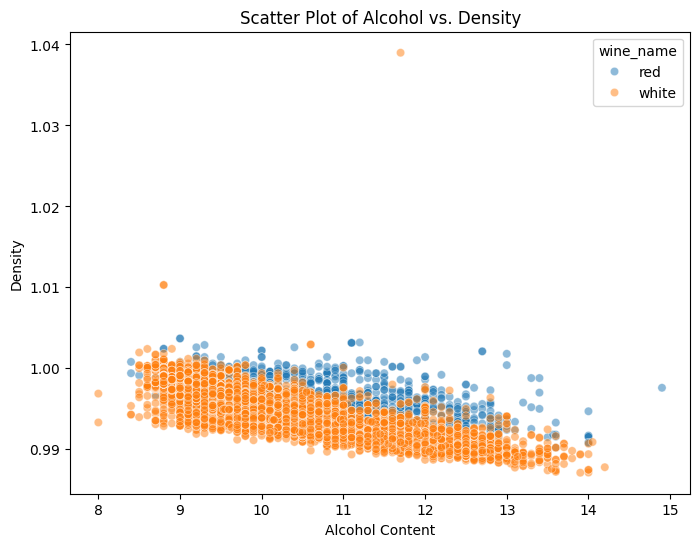

In [29]:
plt.figure(figsize=(8, 6)) 
sns.scatterplot(x='alcohol', y='density', data=df, alpha=0.5, hue='wine_name')
plt.xlabel('Alcohol Content')
plt.ylabel('Density')
plt.title('Scatter Plot of Alcohol vs. Density')
plt.show()

In [30]:
df[['alcohol', 'density']].corr() # correlation matrix with just alcohol and density selected

,alcohol,density
alcohol,1.000000,-0.686745
density,-0.686745,1.000000


### *Scatterplot above suggests that density and alcohol content in the wine(both red and white) are somewhat negatively correlated* 
### *Also correlatoin matrix also shows that alcohol and denisty are negatively corelated with value -0.6867*

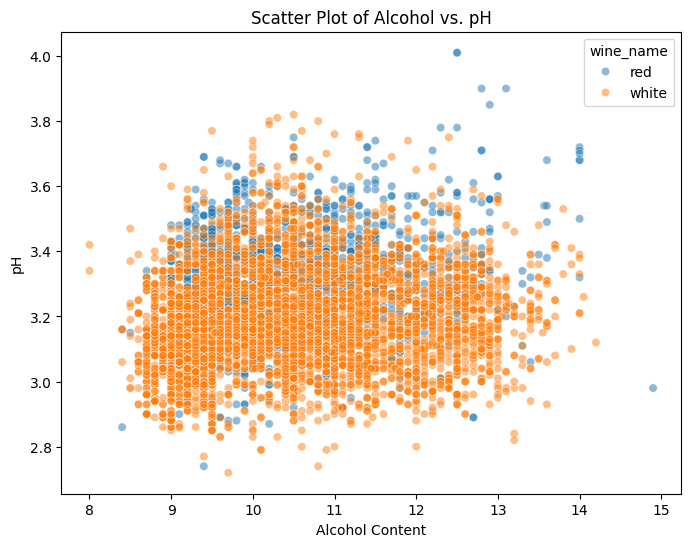

In [31]:
plt.figure(figsize=(8, 6)) 
sns.scatterplot(x='alcohol', y='pH', data=df, alpha=0.5, hue='wine_name')
plt.xlabel('Alcohol Content')
plt.ylabel('pH')
plt.title('Scatter Plot of Alcohol vs. pH')
plt.show()

Convert categorical column into numeric using Label Encoder

In [32]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to the 'wine_name' column
df['wine_name'] = label_encoder.fit_transform(df['wine_name'])

### Let's see correlation matrix to see some other corelations

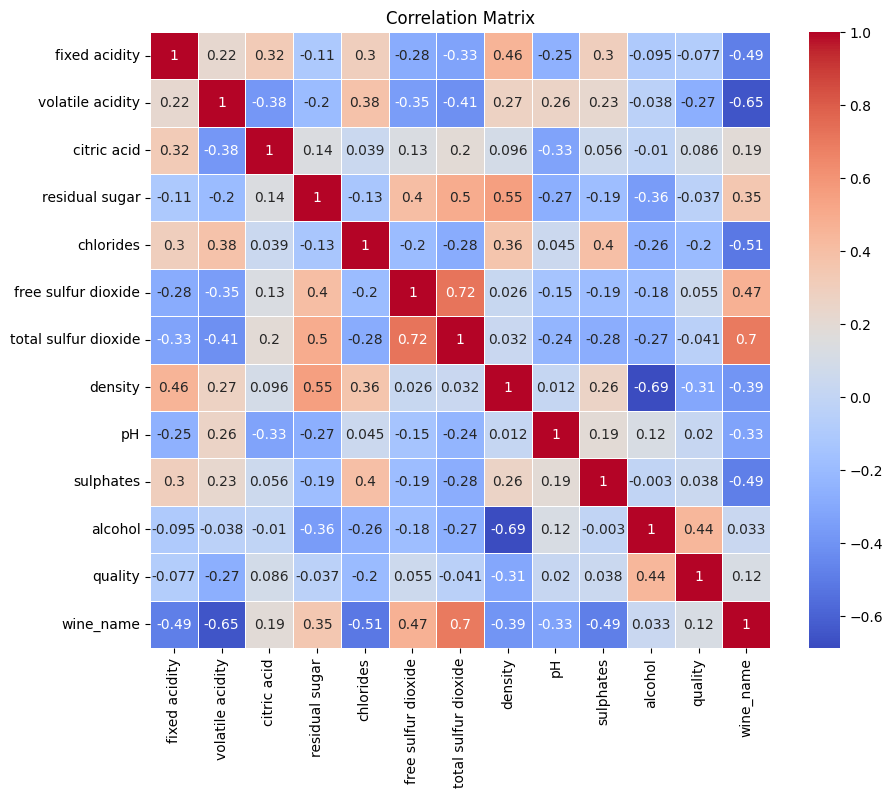

In [33]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### *-> 0.55 for density vs residual sugar also suggests positive correlation*
### *-> 0.46 for density vs fixed acidity*
### *-> 0.44 for alcohol vs qualtiy*
## *-> 0.72 for total sulphur dioxide vs free sulphur dioxide has very strong correlatoin so during feature reduction only one of these can be selected, dropping the other one*

## We can use pairplot to quickly analyze relation between features

<Figure size 800x800 with 0 Axes>

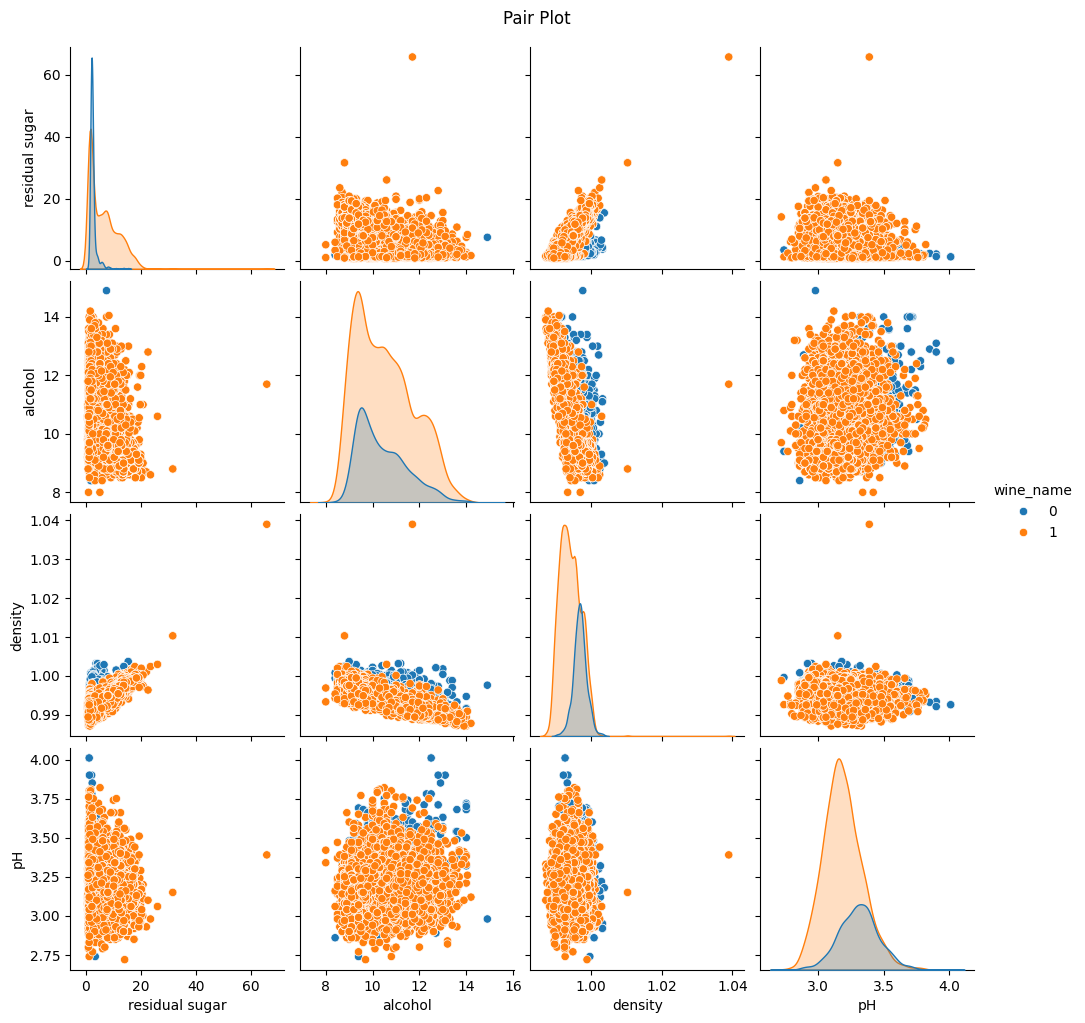

In [34]:
subset_columns = ['residual sugar', 'alcohol', 'density','pH','wine_name']
subset_df = df[subset_columns]

plt.figure(figsize=(8,8))
sns.pairplot(subset_df, kind='scatter', hue='wine_name')
plt.suptitle('Pair Plot', y=1.02)
plt.show()


TypeError: plot() got an unexpected keyword argument 'x'

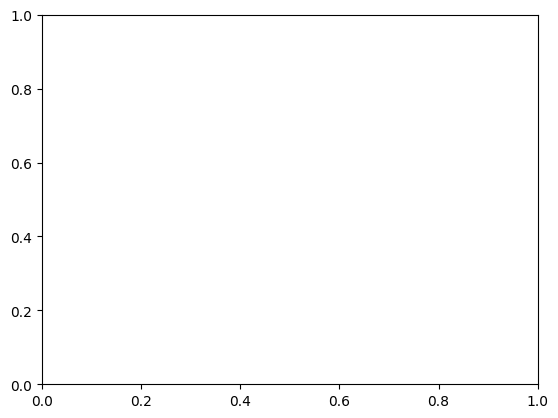

In [35]:
# Plot a scatter plot of fixed acidity vs. volatile acidity, colored by alcohol content
plt.plot(kind="scatter", x="fixed acidity", y="volatile acidity", c="alcohol", cmap="jet")

plt.xlabel("Fixed acidity")
plt.ylabel("Volatile acidity")
plt.title("Wine quality vs. fixed acidity and volatile acidity")

# Add a legend to the plot
plt.legend()

plt.show()

## Wines with higher fixed acidity, alcohol content, and lower volatile acidity tend to be of higher quality.

### Now we will look at the correlation of all the attributes with the expected class attribute (quality)

In [ ]:
corr_matrix = df.corr()# computes the standard correlation coefficient between every pair of attributes
corr_matrix["quality"].sort_values(ascending=False)

In [ ]:
sns.lineplot(x='quality', y='alcohol', data=df)

# Add labels and title
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.title('Relationship between quality and alcohol content in wine')
# Show the plot
plt.show()

##### This chart shows a positive correlation between wine quality and alcohol content, meaning that wines with higher alcohol content tend to be of higher quality.

## Viz with hue="wine_quality" 

In [ ]:
plt.figure(figsize=(10,8))
sns.jointplot(x='fixed acidity',y='sulphates', data = df, hue = 'quality')
sns.jointplot(x='fixed acidity',y='alcohol', data=df, hue = 'quality')
sns.jointplot(x='fixed acidity',y='pH', data=df, hue = 'quality')
sns.jointplot(x='fixed acidity',y='volatile acidity', data=df, hue = 'quality')
plt.show()

'Histogram of quality (with KDE)' entry[16] and this show how the quality is hard to determine according to our dataset.  
The maximum of correlation is with alcohol 0.44.

In [ ]:
df["quality"].value_counts()

very few wines of high quality (8, 9) 